In [1]:
# Packages
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# Import game level stats for GK and FP
## 2017 and 2020 dropped from project. Inconsistent statistics available for 2017, No all star game in 2020
S22_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S22_GK_stats.csv')
S21_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S21_GK_stats.csv')
S19_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S19_GK_stats.csv')
S18_GK_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S18_GK_stats.csv')
S22_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S22_FP_stats.csv')
S21_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S21_FP_stats.csv')
S19_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S19_FP_stats.csv')
S18_FP_stats = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/S18_FP_stats.csv')

In [3]:
GK_stats = pd.concat([S22_GK_stats,S21_GK_stats,S19_GK_stats,S18_GK_stats], ignore_index= True)
# GK_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/GK_stats.csv') # save file
FP_stats = pd.concat([S22_FP_stats,S21_FP_stats,S19_FP_stats,S18_FP_stats], ignore_index= True)
# FP_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/FP_stats.csv') # save file

In [4]:
# Add Captain Indicator
FP_stats['Captain'] = 0
FP_stats.loc[FP_stats['Start'] == "Y*", 'Captain'] = 1
GK_stats['Captain'] = 0
GK_stats.loc[GK_stats['Start'] == "Y*", 'Captain'] = 1
# Add Count of Games Played (will be aggregated)
FP_stats['Games_Played'] = 1
GK_stats['Games_Played'] = 1

In [5]:
# Isolate Y/N from start status
FP_stats['Start'] = FP_stats['Start'].str[0]
GK_stats['Start'] = GK_stats['Start'].str[0]
# Convert Start to bool
FP_stats['Start'] = FP_stats['Start'].replace({'Y':1,'N':0})
GK_stats['Start'] = GK_stats['Start'].replace({'Y':1,'N':0})
# Summarize team performance using match result scoring
FP_stats['Win_Loss_Draw'] = FP_stats['Win_Loss_Draw'].replace({'L':0, 'D':1, 'W':3})
GK_stats['Win_Loss_Draw'] = GK_stats['Win_Loss_Draw'].replace({'L':0, 'D':1, 'W':3})
# Drop stats that occur after All star game 
FP_stats[FP_stats['Before_All_Star'] == True]
GK_stats[GK_stats['Before_All_Star'] == True]

,Unnamed: 0,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,...,Stp%,#OPA,AvgDist,Match Report,fbref_ID,Win_Loss_Draw,Season,Before_All_Star,Captain,Games_Played
0,0,2022-05-22,Sun,MLS,Regular Season,Away,L 1–2,Vancouver,Charlotte,1,...,0.0,0.0,10.4,Match Report,d6aa8848,0,2022,True,0,1
1,1,2022-08-03,Wed,MLS,Regular Season,Home,L 0–1,San Jose,Inter Miami,0,...,NaN,0.0,14.5,Match Report,9110da2b,0,2022,True,0,1
2,2,2022-08-06,Sat,MLS,Regular Season,Away,D 3–3,San Jose,Austin,1,...,0.0,0.0,15.0,Match Report,9110da2b,1,2022,True,0,1
3,3,2022-05-07,Sat,MLS,Regular Season,Away,D 1–1,Portland Timbers,NY Red Bulls,1,...,0.0,0.0,9.8,Match Report,7fd42a85,1,2022,True,0,1
4,4,2022-07-03,Sun,MLS,Regular Season,Away,D 2–2,Portland Timbers,Nashville,1,...,18.2,0.0,6.0,Match Report,7fd42a85,1,2022,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,809,2018-07-07,Sat,MLS,Regular Season,Home,W 3–0,Houston Dynamo,Minnesota Utd,1,...,33.3,0.0,11.7,Match Report,467f09c8,3,2018,True,0,1
3583,810,2018-07-14,Sat,MLS,Regular Season,Away,D 0–0,Houston Dynamo,Colorado Rapids,1,...,20.0,2.0,19.2,Match Report,467f09c8,1,2018,True,0,1
3584,811,2018-07-21,Sat,MLS,Regular Season,Home,D 1–1,Houston Dynamo,FC Dallas,1,...,33.3,0.0,8.8,Match Report,467f09c8,1,2018,True,0,1
3585,812,2018-07-25,Wed,MLS,Regular Season,Home,L 1–3,Houston Dynamo,Philadelphia,1,...,12.5,0.0,12.6,Match Report,467f09c8,0,2018,True,0,1


In [6]:
# Drop fields that are not needed
FP_stats = FP_stats.drop(['Unnamed: 0','Date','Day','Comp','Round','Venue','Result','Squad','Opponent','Pos','Match Report','Before_All_Star'], axis = 1)
GK_stats = GK_stats.drop(['Unnamed: 0','Date','Day','Comp','Round','Venue','Result','Squad','Opponent','Pos','Match Report','Before_All_Star'], axis = 1)

In [7]:
print(FP_stats.columns)
print(GK_stats.columns)

Index(['Start', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
       'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA',
       'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'Prog', 'Carries', 'Prog.1', 'Succ',
       'Att.1', 'fbref_ID', 'Win_Loss_Draw', 'Season', 'Captain',
       'Games_Played'],
      dtype='object')
Index(['Start', 'Min', 'SoTA', 'GA', 'Saves', 'Save%', 'CS', 'PSxG', 'PKatt',
       'PKA', 'PKsv', 'PKm', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%',
       'AvgLen', 'Att.2', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%',
       '#OPA', 'AvgDist', 'fbref_ID', 'Win_Loss_Draw', 'Season', 'Captain',
       'Games_Played'],
      dtype='object')


In [8]:
# Summarize player stats by ID, season, before all star game
## Aggregation dicts (could this be simplified by using tuples?)
    # Should more of the aggregations be mean instead of sum to account for...
FP_aggs = {'Start':'sum', 'Min':'sum', 'Gls':'sum', 'Ast':'sum', 'PK':'sum', 'PKatt':'sum', 'Sh':'sum', 
           'SoT':'sum', 'CrdY':'sum', 'CrdR':'sum', 'Touches':'sum', 'Press':'sum', 'Tkl':'sum', 'Int':'sum', 
           'Blocks':'sum', 'xG':'mean', 'npxG':'mean', 'xA':'mean', 'SCA':'sum', 'GCA':'sum', 'Cmp':'sum', 'Att':'sum', 
           'Cmp%':'mean', 'Prog':'sum', 'Carries':'sum', 'Prog.1':'sum', 'Succ':'sum', 'Att.1':'sum', 'Win_Loss_Draw':'sum', 
           'Captain':'sum', 'Games_Played':'sum'}
GK_aggs = {'Start':'sum', 'Min':'sum', 'SoTA':'sum', 'GA':'sum', 'Saves':'sum', 'Save%':'mean', 'CS':'sum', 'PSxG':'mean', 
           'PKatt':'sum', 'PKA':'sum', 'PKsv':'sum', 'PKm':'sum', 'Cmp':'sum', 'Att':'sum', 'Cmp%':'mean', 'Att.1':'sum', 
           'Thr':'sum', 'Launch%':'mean', 'AvgLen':'mean', 'Att.2':'sum', 'Launch%.1':'mean', 'AvgLen.1':'mean', 'Opp':'sum', 
           'Stp':'sum', 'Stp%':'mean', '#OPA':'sum', 'AvgDist':'mean', 'Win_Loss_Draw':'sum', 'Captain':'sum', 'Games_Played':'sum'}

FP_stats = FP_stats.groupby(['fbref_ID', 'Season']).agg(FP_aggs).reset_index()
GK_stats = GK_stats.groupby(['fbref_ID', 'Season']).agg(GK_aggs).reset_index()

In [9]:
# Add All-Star Indicator
AS_roster = pd.read_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/all_star_rosters.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(AS_roster[['Year','fbref_ID']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID']).rename(columns={'Year':'all_star'})
FP_stats['all_star'] = FP_stats['all_star'].fillna(False).replace([2018,2019,2021,2022],True) 
GK_stats = GK_stats.merge(AS_roster[['Year','fbref_ID']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID']).rename(columns={'Year':'all_star'})
GK_stats['all_star'] = GK_stats['all_star'].fillna(False).replace([2018,2019,2021,2022],True) 

# All-Star in previous season
prev_all_star = pd.read_csv('C:/Users/scott/OneDrive/Documents/GitHub/Capstone/Data/all_star_rosters_prev.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(prev_all_star[['Year','fbref_ID','prev_as']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID'], suffixes=(None,'_right'))
FP_stats['prev_as']=FP_stats['prev_as'].fillna(0)
FP_stats=FP_stats.drop(columns = 'Year')
GK_stats = GK_stats.merge(prev_all_star[['Year','fbref_ID','prev_as']], how = 'left', left_on = ['Season','fbref_ID'], right_on = ['Year','fbref_ID'], suffixes=(None,'_right'))
GK_stats['prev_as']=GK_stats['prev_as'].fillna(0)
GK_stats=GK_stats.drop(columns = 'Year')

In [10]:
# Rename Features to useful names
FP_name_dict = {'fbref_ID':'fbref_ID', 'Season':'Season','Start':'Count_Starts', 'Min':'Minutes_Played', 'Gls':'Goals', 'Ast':'Assists', 
                'PK':'Penalty_Kick_Success', 'PKatt':'Penalty_Kick_Attempts', 'Sh':'Shots', 'SoT':'Shot_on_Target', 'CrdY':'Yellow_Card', 
                'CrdR':'Red_Card', 'Touches':'Touches', 'Press':'Press', 'Tkl':'Tackles', 'Int':'Interceptions', 'Blocks':'Blocks', 'xG':'Exp_Goals', 
                'npxG':'Expect_None_PK_Goal', 'xA':'Expect_Assist', 'SCA':'Shot_Create_Action', 'GCA':'Goal_Create_Action', 'Cmp':'Complete_Passes', 
                'Att':'Attempt_Passes', 'Cmp%':'Pass_Complete_Percent', 'Prog':'Progressive_Passes', 'Carries':'Carries', 'Prog.1':'Progressive_Dribble', 
                'Succ':'Success_Dribble', 'Att.1':'Attempt_Dribble', 'Win_Loss_Draw':'Win_Loss_Draw','Captain':'Captain', 'Games_Played':'Games_Played', 'all_star':'all_star'}
GK_name_dict = {'fbref_ID':'fbref_ID', 'Season':'Season','Start':'Count_Starts', 'Min':'Minutes_Played', 'SoTA':'Shots_on_Target_Attempt', 'GA':'Goals_Against', 
                'Saves':'Saves', 'Save%':'Save%', 'CS':'Clean_Sheet', 'PSxG':'PS_Expect_Goals', 'PKatt':'PK_Attempt', 'PKA':'PK_Goal_Allowed', 'PKsv':'PK_Saved', 
                'PKm':'PK_Missed', 'Cmp':'Pass_Complete_40', 'Att':'Pass_Attempt_40', 'Cmp%':'Pass_Complete_Percent_40', 'Att.1':'Pass_Attempt', 'Thr':'Throws_Attempt', 
                'Launch%':'Pass_over40_Percent', 'AvgLen':'Pass_Distance', 'Att.2':'Goal_Kick_Attempt', 'Launch%.1':'Goal_Kick_Launch_Percent', 'AvgLen.1':'Goal_Kick_Distance',
                'Opp':'Cross_Attempted', 'Stp':'Cross_Stopped', 'Stp%':'Cross_Stop_Percent', '#OPA':'Defensive_Actions', 'AvgDist':'Distance_from_Goal', 
                'Win_Loss_Draw':'Win_Loss_Draw', 'Captain':'Captain', 'Games_Played':'Games_Played', 'all_star':'all_star'}
FP_stats.rename(columns = FP_name_dict, inplace = True)
GK_stats.rename(columns = GK_name_dict, inplace = True)

# Exploratory Data Analysis

In [11]:
# Address missing data
print(FP_stats.isnull().sum())
print(GK_stats.isnull().sum())
FP_stats = FP_stats.fillna(0)
GK_stats = GK_stats.fillna(0)

FP_stats.info()
GK_stats.info()
FP_stats.describe()

fbref_ID                 0
Season                   0
Count_Starts             0
Minutes_Played           0
Goals                    0
Assists                  0
Penalty_Kick_Success     0
Penalty_Kick_Attempts    0
Shots                    0
Shot_on_Target           0
Yellow_Card              0
Red_Card                 0
Touches                  0
Press                    0
Tackles                  0
Interceptions            0
Blocks                   0
Exp_Goals                2
Expect_None_PK_Goal      2
Expect_Assist            2
Shot_Create_Action       0
Goal_Create_Action       0
Complete_Passes          0
Attempt_Passes           0
Pass_Complete_Percent    8
Progressive_Passes       0
Carries                  0
Progressive_Dribble      0
Success_Dribble          0
Attempt_Dribble          0
Win_Loss_Draw            0
Captain                  0
Games_Played             0
all_star                 0
prev_as                  0
dtype: int64
fbref_ID                    0
Season      

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Success,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,...,Pass_Complete_Percent,Progressive_Passes,Carries,Progressive_Dribble,Success_Dribble,Attempt_Dribble,Win_Loss_Draw,Captain,Games_Played,prev_as
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,...,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,2020.153631,14.229449,1279.988428,2.067438,1.459697,0.184757,0.234637,18.436951,6.222267,2.671588,...,77.768724,49.653631,532.468875,58.273743,13.357143,22.972466,26.493615,1.290104,19.180367,0.006784
std,1.579289,10.724477,926.157509,3.597937,2.209617,0.780362,0.927735,21.983268,8.596597,2.653865,...,10.349214,50.066373,442.638156,58.493496,16.201419,27.615402,17.575573,5.253650,10.574788,0.091308
min,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019.000000,4.000000,433.500000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,73.318561,10.000000,153.000000,14.000000,2.000000,4.000000,11.000000,0.000000,10.000000,0.000000
50%,2021.000000,13.000000,1191.000000,1.000000,1.000000,0.000000,0.000000,11.000000,3.000000,2.000000,...,79.040517,35.000000,434.500000,40.000000,8.000000,13.000000,26.000000,0.000000,20.000000,0.000000
75%,2022.000000,24.000000,2069.000000,2.000000,2.000000,0.000000,0.000000,24.750000,8.000000,4.000000,...,84.017969,72.000000,823.750000,86.000000,18.000000,32.000000,39.000000,0.000000,28.000000,0.000000
max,2022.000000,39.000000,3420.000000,36.000000,15.000000,9.000000,11.000000,161.000000,64.000000,15.000000,...,100.000000,326.000000,2312.000000,441.000000,135.000000,216.000000,81.000000,37.000000,39.000000,2.000000


In [12]:
# Enhance PK features, Captain, % start, previous all star
FP_stats['PK_Succ'] = (FP_stats['Penalty_Kick_Success']/FP_stats['Penalty_Kick_Attempts'])
FP_stats['Captain_%'] = (FP_stats['Captain']/FP_stats['Games_Played'])
GK_stats['Captain_%'] = (GK_stats['Captain']/GK_stats['Games_Played'])
FP_stats['Start_%'] = (FP_stats['Count_Starts']/FP_stats['Games_Played'])
GK_stats['Start_%'] = (GK_stats['Count_Starts']/GK_stats['Games_Played'])



In [13]:
FP_stats.groupby('all_star').mean()

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Success,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,...,Progressive_Dribble,Success_Dribble,Attempt_Dribble,Win_Loss_Draw,Captain,Games_Played,prev_as,PK_Succ,Captain_%,Start_%
all_star,,,,,,,,,,,,,,,,,,,,,
False,2020.161826,13.674689,1230.805809,1.831950,1.334855,0.140249,0.178008,17.089627,5.706639,2.587552,...,55.028216,12.475934,21.475104,25.580498,1.06390,18.729876,0.000000,0.732715,0.038805,0.634178
True,2019.947917,28.156250,2514.677083,7.979167,4.593750,1.302083,1.656250,52.260417,19.166667,4.781250,...,139.750000,35.479167,60.562500,49.416667,6.96875,30.489583,0.177083,0.784689,0.225367,0.920527


In [14]:
print(round((len(FP_stats[FP_stats['all_star']==1])/len(FP_stats)*100),2),'% of field players are an all-star each year, averaged across 4 seasons')
print(round((len(GK_stats[GK_stats['all_star']==1])/len(GK_stats)*100),2),'% of goal keepers are an all-star each, averaged across 4 seasons')
# Target feature is significatly imbalanced in population, will likely need to resample training data

3.83 % of field players are an all-star each year, averaged across 4 seasons
4.89 % of goal keepers are an all-star each, averaged across 4 seasons


# Normalize data by season

In [15]:
S22_GK_stats = GK_stats[GK_stats['Season'] == 2022]
S21_GK_stats = GK_stats[GK_stats['Season'] == 2021]
S19_GK_stats = GK_stats[GK_stats['Season'] == 2019]
S18_GK_stats = GK_stats[GK_stats['Season'] == 2018]
S22_FP_stats = FP_stats[FP_stats['Season'] == 2022]
S21_FP_stats = FP_stats[FP_stats['Season'] == 2021]
S19_FP_stats = FP_stats[FP_stats['Season'] == 2019]
S18_FP_stats = FP_stats[FP_stats['Season'] == 2018]

In [16]:
def normalize_FP(df):
    result = df.copy()
    for feature_name in df.columns[np.r_[2:33,34:37]]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def normalize_GK(df):
    result = df.copy()
    for feature_name in df.columns[np.r_[2:32,33:35]]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
# Is there a way to normalize by season without needing to split DF by season and then reassemble?

In [17]:
# Normalize all features by each season and FP/GK
S22_GK_stats = normalize_GK(S22_GK_stats)
S21_GK_stats = normalize_GK(S21_GK_stats)
S19_GK_stats = normalize_GK(S19_GK_stats)
S18_GK_stats = normalize_GK(S18_GK_stats)
S22_FP_stats = normalize_FP(S22_FP_stats)
S21_FP_stats = normalize_FP(S21_FP_stats)
S19_FP_stats = normalize_FP(S19_FP_stats)
S18_FP_stats = normalize_FP(S18_FP_stats)

# Join DFs back together
GK_stats = pd.concat([S22_GK_stats,S21_GK_stats,S19_GK_stats,S18_GK_stats], ignore_index= True)
FP_stats = pd.concat([S22_FP_stats,S21_FP_stats,S19_FP_stats,S18_FP_stats], ignore_index= True)

In [18]:
# Add Player details
demo = pd.read_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/player_demographics.csv', encoding = 'iso-8859-1')
FP_stats = FP_stats.merge(demo, how = 'left', on = ['Season','fbref_ID'])
GK_stats = GK_stats.merge(demo, how = 'left', on = ['Season','fbref_ID'])

In [19]:
FP_stats.groupby(['Season','Pos'])['Pos'].count()

Season  Pos 
2018    DF      186
        DFFW     12
        DFMF     21
        FW       86
        FWDF      7
        FWMF     78
        MF       98
        MFDF     16
        MFFW     56
2019    DF      197
        DFFW      7
        DFMF     10
        FW       83
        FWDF      8
        FWMF     90
        MF      107
        MFDF     14
        MFFW     58
2021    DF      229
        DFFW     10
        DFMF     18
        FW       96
        FWDF     11
        FWMF    100
        MF      120
        MFDF     14
        MFFW     67
2022    DF      237
        DFFW     15
        DFMF     21
        FW      104
        FWDF      7
        FWMF    108
        MF      156
        MFDF     13
        MFFW     46
Name: Pos, dtype: int64

In [20]:
# Add Model Indicators Based on role
## FP_stats.groupby(['Pos'])['Pos'].count()
FP_stats['DF_model'] = FP_stats['Pos'].str.contains('DF') == True
FP_stats['MF_model'] = FP_stats['Pos'].str.contains('MF') == True
FP_stats['FW_model'] = FP_stats['Pos'].str.contains('FW') == True

In [21]:
FP_stats.groupby(['FW_model','MF_model','DF_model'])['fbref_ID'].count()
# No players fit in all models, but a large number cross into two
# Especially forwards and midfielders. This is expected based on role. Expect to see similar features of importance for both models

FW_model  MF_model  DF_model
False     False     True        849
          True      False       481
                    True        127
True      False     False       369
                    True         77
          True      False       603
Name: fbref_ID, dtype: int64

In [22]:
print(FP_stats.isnull().sum()) # a vast majority of players did not attempt a penalty kick, so there are many nulls
print(GK_stats.isnull().sum())
FP_stats=FP_stats.fillna(0)
GK_stats=GK_stats.fillna(0)

fbref_ID                    0
Season                      0
Count_Starts                0
Minutes_Played              0
Goals                       0
Assists                     0
Penalty_Kick_Success        0
Penalty_Kick_Attempts       0
Shots                       0
Shot_on_Target              0
Yellow_Card                 0
Red_Card                    0
Touches                     0
Press                       0
Tackles                     0
Interceptions               0
Blocks                      0
Exp_Goals                   0
Expect_None_PK_Goal         0
Expect_Assist               0
Shot_Create_Action          0
Goal_Create_Action          0
Complete_Passes             0
Attempt_Passes              0
Pass_Complete_Percent       0
Progressive_Passes          0
Carries                     0
Progressive_Dribble         0
Success_Dribble             0
Attempt_Dribble             0
Win_Loss_Draw               0
Captain                     0
Games_Played                0
all_star  

In [23]:
FW = FP_stats[FP_stats['FW_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model'], axis = 1)
#FW_KB.columns
#print(FW.isnull().sum())
MF = FP_stats[FP_stats['MF_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model'], axis = 1)
DF = FP_stats[FP_stats['DF_model'] == True].drop(['Nation', 'Pos','DF_model', 'MF_model', 'FW_model'], axis = 1)
GK = GK_stats.drop(['Nation','Pos'], axis = 1)

In [24]:
X = FW[FW.columns[~FW.columns.isin(['Player','all_star','fbref_ID'])]]
Y = FW['all_star']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
32,prev_as,156.406250
30,Captain,103.037364
34,Captain_%,102.781903
6,Penalty_Kick_Attempts,67.380021
5,Penalty_Kick_Success,58.034614
33,PK_Succ,44.319215
3,Goals,42.525906
20,Goal_Create_Action,39.232209
8,Shot_on_Target,34.926953
4,Assists,32.363801


In [25]:
X = MF[MF.columns[~MF.columns.isin(['Player','all_star','fbref_ID'])]]
Y = MF['all_star']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
32,prev_as,106.090909
6,Penalty_Kick_Attempts,57.290016
33,PK_Succ,52.670321
5,Penalty_Kick_Success,50.591580
20,Goal_Create_Action,29.383333
4,Assists,27.997606
19,Shot_Create_Action,26.509592
3,Goals,23.325512
24,Progressive_Passes,22.665034
25,Carries,19.514236


In [26]:
X = DF[MF.columns[~DF.columns.isin(['Player','all_star','fbref_ID'])]]
Y = DF['all_star']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
32,prev_as,154.545455
34,Captain_%,18.279267
30,Captain,18.146481
14,Interceptions,12.158843
1,Count_Starts,11.847231
2,Minutes_Played,11.830290
11,Touches,11.304577
29,Win_Loss_Draw,11.163974
22,Attempt_Passes,10.816649
21,Complete_Passes,10.289824


In [27]:
X = GK[GK.columns[~GK.columns.isin(['Player','all_star','fbref_ID'])]]
Y = GK['all_star']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,Y)
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values(by = 'Score', ascending= False)

,Feature,Score
31,prev_as,5.836364e+01
7,Clean_Sheet,8.655042e+00
28,Win_Loss_Draw,7.464413e+00
30,Games_Played,5.181136e+00
2,Minutes_Played,5.152470e+00
1,Count_Starts,5.075864e+00
16,Pass_Attempt,4.788279e+00
13,Pass_Complete_40,4.641195e+00
17,Throws_Attempt,4.210989e+00
14,Pass_Attempt_40,4.114104e+00


# Modeling

### Algorithms to consider
* Random Forest
* Other Ensemble (decision tree, AdaBoost)
* Neural Network
* Logistic (Need variable selection by model)
* SVM
* KNN?

### Notes
* Test/Train Split should needs to be adjusted 
    * What should be my test criteria? Should season be excluded for testing prediction on new season?
    * How can I assure that test partition has sufficient number of allstar records

In [28]:
# Split into Test/Train
fw_train, fw_test, fw_as_train, fw_as_test = train_test_split(FW[FW.columns[~FW.columns.isin(['Player','all_star','fbref_ID'])]], FW['all_star'], test_size=0.25, random_state=1017, stratify=FW['all_star'])
mf_train, mf_test, mf_as_train, mf_as_test = train_test_split(MF[MF.columns[~MF.columns.isin(['Player','all_star','fbref_ID'])]], MF['all_star'], test_size=0.25, random_state=623, stratify=MF['all_star'])
df_train, df_test, df_as_train, df_as_test = train_test_split(DF[DF.columns[~DF.columns.isin(['Player','all_star','fbref_ID'])]], DF['all_star'], test_size=0.25, random_state=225, stratify=DF['all_star'])
gk_train, gk_test, gk_as_train, gk_as_test = train_test_split(GK[GK.columns[~GK.columns.isin(['Player','all_star','fbref_ID'])]], GK['all_star'], test_size=0.25, random_state=511, stratify=GK['all_star'])

In [29]:
# Upsample training data to address imbalance
from sklearn.utils import resample
fw_resamp = pd.concat([fw_train, fw_as_train], axis = 1)
#fw_resamp['all_star'].value_counts()
## Split by target
fw_resamp_1 = fw_resamp[fw_resamp['all_star'] == 1]
fw_resamp_0 = fw_resamp[fw_resamp['all_star'] == 0]
fw_resamp_1 = resample(fw_resamp_1, replace = True, n_samples = len(fw_resamp_0))
fw_resamp = pd.concat([fw_resamp_0, fw_resamp_1])
print(fw_resamp['all_star'].value_counts())
## Split back into training dfs
fw_as_train = np.ravel(fw_resamp[['all_star']])
fw_train = fw_resamp.loc[:, fw_resamp.columns != 'all_star']

mf_resamp = pd.concat([mf_train, mf_as_train], axis = 1)
#mf_resamp['all_star'].value_counts()
## Split by target
mf_resamp_1 = mf_resamp[mf_resamp['all_star'] == 1]
mf_resamp_0 = mf_resamp[mf_resamp['all_star'] == 0]
mf_resamp_1 = resample(mf_resamp_1, replace = True, n_samples = len(mf_resamp_0))
mf_resamp = pd.concat([mf_resamp_0, mf_resamp_1])
print(mf_resamp['all_star'].value_counts())
## Split back into training dfs
mf_as_train = np.ravel(mf_resamp[['all_star']])
mf_train = mf_resamp.loc[:, mf_resamp.columns != 'all_star']

df_resamp = pd.concat([df_train, df_as_train], axis = 1)
#df_resamp['all_star'].value_counts()
## Split by target
df_resamp_1 = df_resamp[df_resamp['all_star'] == 1]
df_resamp_0 = df_resamp[df_resamp['all_star'] == 0]
df_resamp_1 = resample(df_resamp_1, replace = True, n_samples = len(df_resamp_0))
df_resamp = pd.concat([df_resamp_0, df_resamp_1])
print(df_resamp['all_star'].value_counts())
## Split back into training dfs
df_as_train = np.ravel(df_resamp[['all_star']])
df_train = df_resamp.loc[:, df_resamp.columns != 'all_star']

gk_resamp = pd.concat([gk_train, gk_as_train], axis = 1)
#gk_resamp['all_star'].value_counts()
## Split by target
gk_resamp_1 = gk_resamp[gk_resamp['all_star'] == 1]
gk_resamp_0 = gk_resamp[gk_resamp['all_star'] == 0]
gk_resamp_1 = resample(gk_resamp_1, replace = True, n_samples = len(gk_resamp_0))
gk_resamp = pd.concat([gk_resamp_0, gk_resamp_1])
print(gk_resamp['all_star'].value_counts())
## Split back into training gks
gk_as_train = np.ravel(gk_resamp[['all_star']])
gk_train = gk_resamp.loc[:, gk_resamp.columns != 'all_star']

False    750
True     750
Name: all_star, dtype: int64
False    875
True     875
Name: all_star, dtype: int64
False    764
True     764
Name: all_star, dtype: int64
False    160
True     160
Name: all_star, dtype: int64


In [30]:
fw_resamp_1.groupby('all_star').mean()

,Season,Count_Starts,Minutes_Played,Goals,Assists,Penalty_Kick_Success,Penalty_Kick_Attempts,Shots,Shot_on_Target,Yellow_Card,...,Success_Dribble,Attempt_Dribble,Win_Loss_Draw,Captain,Games_Played,prev_as,PK_Succ,Captain_%,Start_%,Age
all_star,,,,,,,,,,,,,,,,,,,,,
True,2019.890667,0.724838,0.721223,0.460098,0.442248,0.251302,0.298777,0.536901,0.533158,0.272078,...,0.380805,0.39881,0.624443,0.23555,0.796408,0.174,0.482466,0.265477,0.894265,26.942667


In [31]:
# Upsample Function (Not needed & still needs work)
from sklearn.utils import resample
def upsample(X,Y):
    resamp = pd.concat([X, Y], axis = 1)
    ## Split by target
    resamp_1 = resamp[resamp['all_star'] == 1]
    resamp_0 = resamp[resamp['all_star'] == 0]
    resamp_1 = resample(resamp_1, replace = True, n_samples = len(X))
    resamp = pd.concat([resamp_0, resamp_1])
    #print(resamp['all_star'].value_counts())
    ## Split back into training dfs
    Y = np.ravel(fw_resamp[['all_star']])
    X = resamp.loc[:, resamp.columns != 'all_star']
    return X, Y
    

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, class_weight = 'balanced', max_features = 'sqrt')
pprint(clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [33]:
from sklearn.metrics import classification_report
clf.fit(fw_train, fw_as_train)
fw_y_pred = clf.predict(fw_test)

#print('Random Forest FW Accuracy:',metrics.f1_score(fw_as_test, y_pred, average='binary'))
print(classification_report(fw_as_test, fw_y_pred))

fw_rf = clf.fit(mf_train, mf_as_train)
mf_y_pred = clf.predict(mf_test)

#print('Random Forest MF Accuracy:',metrics.f1_score(mf_as_test, y_pred, average = 'binary'))
print(classification_report(mf_as_test, mf_y_pred))

mf_rf = clf.fit(df_train, df_as_train)
df_y_pred = clf.predict(df_test)

#print('Random Forest DF Accuracy:',metrics.f1_score(df_as_test, y_pred))
print(classification_report(df_as_test, df_y_pred))

gk_rf = clf.fit(gk_train, gk_as_train)
gk_y_pred = clf.predict(gk_test)

#print('Random Forest GK Accuracy:',metrics.f1_score(gk_as_test, y_pred))
print(metrics.classification_report(gk_as_test, gk_y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       251
        True       0.56      0.42      0.48        12

    accuracy                           0.96       263
   macro avg       0.76      0.70      0.73       263
weighted avg       0.95      0.96      0.96       263

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       292
        True       0.00      0.00      0.00        11

    accuracy                           0.96       303
   macro avg       0.48      0.50      0.49       303
weighted avg       0.93      0.96      0.94       303

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       256
        True       0.00      0.00      0.00         8

    accuracy                           0.95       264
   macro avg       0.48      0.49      0.49       264
weighted avg       0.94      0.95      0.95       264

              preci

In [34]:
clf.fit(fw_train, fw_as_train)
fw_y_pred = clf.predict_proba(fw_test)
#print(fw_as_test)
#print(fw_y_pred)
type(fw_y_pred)
y = pd.Series([i[1] for i in fw_y_pred])
pd.concat([fw_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

,all_star,0
19,True,0.947
142,False,0.871
47,True,0.830
181,True,0.828
88,False,0.803
193,False,0.682
2,True,0.644
91,False,0.554
75,True,0.510
138,False,0.499


In [35]:
clf.fit(mf_train, mf_as_train)
mf_y_pred = clf.predict_proba(mf_test)
y = pd.Series([i[1] for i in mf_y_pred])
pd.concat([mf_as_test.reset_index(drop=True),y.reset_index(drop=True)], axis=1).sort_values(by = 0, ascending = False).head(20)

,all_star,0
167,False,0.571
8,False,0.506
301,False,0.372
7,False,0.361
183,False,0.341
279,False,0.340
93,False,0.333
12,False,0.302
150,False,0.291
112,False,0.290


#### Random Forest Notes
* Consider running decision tree and evaluate if interpretability is worth accuracy trade off
* CV using cross_val_score and RepeatedStratifiedKFold

### AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=1000, learning_rate=1)
pprint(ab.get_params())

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 1000,
 'random_state': None}


In [37]:
ab_model = ab.fit(fw_train, fw_as_train)
y_pred = ab.predict(fw_test)
print('AdaBoost FW F1:',metrics.f1_score(fw_as_test, y_pred))

ab_model = ab.fit(mf_train, mf_as_train)
y_pred = ab.predict(mf_test)
print('AdaBoost MF F1:',metrics.f1_score(mf_as_test, y_pred))

ab_model = ab.fit(df_train, df_as_train)
y_pred = ab.predict(df_test)
print('AdaBoost DF F1:',metrics.f1_score(df_as_test, y_pred))

ab_model = ab.fit(gk_train, gk_as_train)
y_pred = ab.predict(gk_test)
print('AdaBoost GK F1:',metrics.f1_score(gk_as_test, y_pred))

AdaBoost FW F1: 0.5454545454545454
AdaBoost MF F1: 0.12500000000000003
AdaBoost DF F1: 0.18181818181818182
AdaBoost GK F1: 0.0


### XGBoost

In [38]:
#import sys
#! conda install --yes --prefix {sys.prefix} xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

C:\Users\scott\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [39]:
FW_dmatrix = xgb.DMatrix(fw_train, fw_as_train)

C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [87]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 25000, use_label_encoder=False, learning_rate = 0.01, max_depth = 2, eval_metric = 'auc')
xgb_class.fit(fw_train, fw_as_train)
preds = xgb_class.predict(fw_test)
pprint(xgb_class.get_params())
print(metrics.classification_report(fw_as_test,preds))
print(metrics.f1_score(fw_as_test,preds))

C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 25000,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       251
        True       0.60      0.50      0.55        12

    accuracy                           0.96       263
   macro avg       0.79      0.74      0.76       263
weighted avg       0.96 

## CV GridSearch

In [102]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier



In [108]:
## Fowards
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': range(3,6,1), 'n_estimators': [10000, 15000], 'learning_rate': [0.01,0.1,0.25]}

grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = 'f1', n_jobs = -1, cv = 3, verbose = 2)
grid_search.fit(fw_train, fw_as_train)

grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\scott\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:50:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 15000}

In [110]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 15000, use_label_encoder=False, learning_rate = 0.01, max_depth = 4, reg_lambda = 1)
xgb_class.fit(fw_train, fw_as_train)
preds = xgb_class.predict(fw_test)
#pprint(xgb_class.get_params())
print(metrics.classification_report(fw_as_test,preds))

[01:51:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       251
        True       0.50      0.50      0.50        12

    accuracy                           0.95       263
   macro avg       0.74      0.74      0.74       263
weighted avg       0.95      0.95      0.95       263



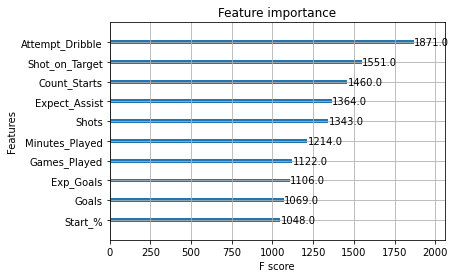

In [111]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.show()

In [113]:
## Midfield
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': range(3,6,1), 'n_estimators': [500, 500], 'learning_rate': [0.01,0.1,0.25]}

grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = 'f1', n_jobs = -1, cv = 3, verbose = 2)
grid_search.fit(mf_train, mf_as_train)

grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\scott\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:57:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [116]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 500, use_label_encoder=False, learning_rate = 0.1, max_depth = 5, reg_lambda = 1)
xgb_class.fit(mf_train, mf_as_train)
preds = xgb_class.predict(mf_test)
#pprint(xgb_class.get_params())
print(metrics.classification_report(mf_as_test,preds))

[02:18:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       292
        True       0.25      0.09      0.13        11

    accuracy                           0.96       303
   macro avg       0.61      0.54      0.56       303
weighted avg       0.94      0.96      0.95       303



In [114]:
## Defender
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': range(3,6,1), 'n_estimators': [10000, 15000], 'learning_rate': [0.01,0.1,0.25]}

grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = 'f1', n_jobs = -1, cv = 3, verbose = 2)
grid_search.fit(df_train, df_as_train)

grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\scott\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:15:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10000}

In [119]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 10000, use_label_encoder=False, learning_rate = 0.01, max_depth = 3, reg_lambda = 1)
xgb_class.fit(df_train, df_as_train)
preds = xgb_class.predict(df_test)
#pprint(xgb_class.get_params())
print(metrics.classification_report(df_as_test,preds))

C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:19:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       256
        True       0.14      0.12      0.13         8

    accuracy                           0.95       264
   macro avg       0.56      0.55      0.55       264
weighted avg       0.95      0.95      0.95       264



In [120]:
## Goalkeepers
est = XGBClassifier(objective = 'binary:logistic', seed= 511)
param = {'max_depth': range(3,6,1), 'n_estimators': [10000, 15000], 'learning_rate': [0.01,0.1,0.25]}

grid_search = GridSearchCV(estimator = est, param_grid = param, scoring = 'f1', n_jobs = -1, cv = 5, verbose = 2)
grid_search.fit(gk_train, gk_as_train)

grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\scott\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\scott\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:23:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 10000}

In [121]:
xgb_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 10000, use_label_encoder=False, learning_rate = 0.25, max_depth = 4, reg_lambda = 1)
xgb_class.fit(gk_train, gk_as_train)
preds = xgb_class.predict(gk_test)
#pprint(xgb_class.get_params())
print(metrics.classification_report(gk_as_test,preds))

[02:24:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.94      0.94      0.94        54
        True       0.00      0.00      0.00         3

    accuracy                           0.89        57
   macro avg       0.47      0.47      0.47        57
weighted avg       0.89      0.89      0.89        57



## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

features = ['Captain_%','PK_Succ','Goals','Goal_Create_Action','Shot_on_Target','Assists']
logreg = LogisticRegression(random_state=1017)

# fit the model with data
logreg.fit(fw_train[features], fw_as_train)

fw_y_pred = logreg.predict(fw_test[features])
print(metrics.classification_report(fw_as_test, fw_y_pred))

              precision    recall  f1-score   support

       False       1.00      0.82      0.90       251
        True       0.20      0.92      0.33        12

    accuracy                           0.83       263
   macro avg       0.60      0.87      0.62       263
weighted avg       0.96      0.83      0.88       263



# Misc

### Neural Network

In [44]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs')

pprint(clf.get_params())

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [45]:
clf.fit(fw_train, fw_as_train)
y_pred = clf.predict(fw_test)
print('NN FW Accuracy:',metrics.f1_score(fw_as_test, y_pred))

clf.fit(mf_train, mf_as_train)
y_pred = clf.predict(mf_test)
print('NN MF Accuracy:',metrics.f1_score(mf_as_test, y_pred))

clf.fit(df_train, df_as_train)
y_pred = clf.predict(df_test)
print('NN DF Accuracy:',metrics.f1_score(df_as_test, y_pred))
# Defender model does not consistently converge

clf.fit(gk_train, gk_as_train)
y_pred = clf.predict(gk_test)
print('NN GK Accuracy:',metrics.f1_score(gk_as_test, y_pred))

NN FW Accuracy: 0.08727272727272728
NN MF Accuracy: 0.0


C:\Users\scott\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\scott\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN DF Accuracy: 0.15625
NN GK Accuracy: 0.17647058823529413


In [46]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from math import sqrt
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(fw_train, fw_as_train)
train_preds = knn_model.predict(fw_test)
mse = mean_squared_error(fw_as_train, train_preds)
rmse = sqrt(mse)
rmse

ValueError: Found input variables with inconsistent numbers of samples: [1500, 263]

In [ ]:
# Find Optimal K
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(fw_train, fw_as_train)
print('Ideal K', gridsearch.best_params_)
print('KNN FW Accuracy:',metrics.accuracy_score(fw_as_test, train_preds))

In [ ]:
# DFs for individual seasons
S22_FP = FP_stats[FP_stats['Season'] == 2022]
S22_GK = GK_stats[GK_stats['Season'] == 2022]
S21_FP = FP_stats[FP_stats['Season'] == 2021]
S21_GK = GK_stats[GK_stats['Season'] == 2021]
S19_FP = FP_stats[FP_stats['Season'] == 2019]
S19_GK = GK_stats[GK_stats['Season'] == 2019]
S18_FP = FP_stats[FP_stats['Season'] == 2018]
S18_GK = GK_stats[GK_stats['Season'] == 2018]

In [ ]:
# Save Stats to file
FP_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/FP_stats.csv')
GK_stats.to_csv('C:/Users/scott/OneDrive/BANA/Capstone/Data/GK_stats.csv')

In [ ]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(GK_stats.iloc[:,2:30],GK_stats['all_star'])

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

### Additional Features Needed?

* Update Field Names to be interpretable 
* consider enhancing start feature to be % start or new feature for games played

### Grouping

* most stats should be summed, review to confirm

### Parameters for all star game
* breakdown by position (check year by year)
* primarily used for final conclusions

### Models
* Start with full model that considers all field players. Will always need a separate model for GK due to different set of metrics
* Build sub-models for position groups (fw, mid, def, gk)?
    * Would need separate groupings to handle players that split across positions and roles like 'wing'